## Assignment 2 Solutions

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

sys.path.append('../ex1/')

from regression.cost_func import *
from regression.plot_boundary import *

pp = pprint.PrettyPrinter()

#### Use example set 1

In [2]:
data1 = pd.read_csv("ex2data1.txt", sep=",", header=None)
data1.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


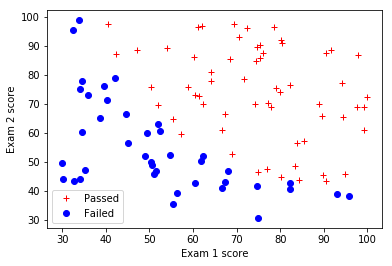

In [3]:
data1pass = data1[data1[2] == 1]
data1fail = data1[data1[2] == 0]

exam1pass = data1pass[0]
exam2pass = data1pass[1]
exam1fail = data1fail[0]
exam2fail = data1fail[1]

plt.plot(exam1pass, exam2pass, 'r+')
plt.plot(exam1fail, exam2fail, 'bo')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'])
plt.show()
plt.clf()
plt.cla()
plt.close()


In [4]:
if data1.shape[1] != 4:
    intercept_coeff = np.ones((len(data1)))
    data1.insert(0,'x',intercept_coeff)
    data1.columns = [0, 1, 2, 3]
data1.head()

,0,1,2,3
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


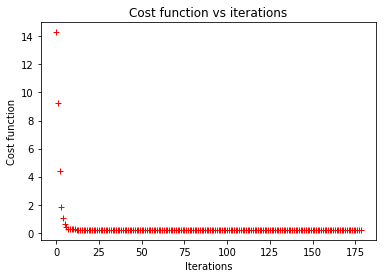

In [5]:
ITERS = 5000
ALPHA = 1E+1
TOL = 1E-10

X = data1[[0, 1, 2]].values
Y = data1[[3]].values
theta = np.array([-24, 0.2, 0.2])   #initialize theta with random values
theta = theta.reshape((3,1))    #change dimensions to 3x1, converting to 2d array

# theta_ne = normal_eqn(X, Y)
# Y_ne = 1/(1 + np.exp(-X @ theta_ne))

X_normal, meanmat, stdmat = scale_feature(X)
theta_gd, COST = grad_descent(X_normal, Y, theta, ALPHA, ITERS, TOL, 'log')
# theta_gd, COST = grad_descent(X, Y, theta, ALPHA, ITERS, TOL, 'log')
Y_gd = 1/(1 + np.exp(-np.array([1, (45-meanmat[0])/stdmat[0],\
    (85-meanmat[1])/stdmat[1]]) @ theta_gd))    #predict exam result for student with 
                                                #45 marks in exam 1 and 85 in exam 2

# Y_gd = 1/(1 + np.exp(-np.array([[1, 45, 85]]) @ theta_gd))    
                                                
plt.plot(range(len(COST)), COST, 'r+')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Cost function vs iterations')
plt.show()
plt.clf()
plt.cla()
plt.close()

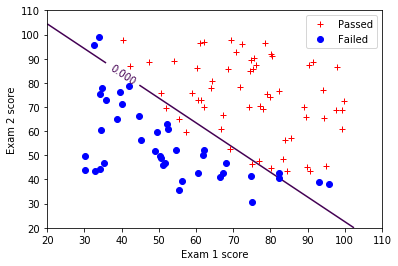

In [6]:
plt.plot(exam1pass, exam2pass, 'r+')
plt.plot(exam1fail, exam2fail, 'bo')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'])
cl1, z = plot_boundary(theta_gd, 20, 110, 1, 1, meanmat, stdmat)
plt.show()
plt.clf()
plt.cla()
plt.close()


In [7]:
X_ndim = map_feature(X, 3)
X_normal_ndim, meanmat_ndim, stdmat_ndim = scale_feature(X_ndim)
theta_ndim = np.array([-1E-1]*X_ndim.shape[1])   #initialize theta with random values
theta_ndim = theta_ndim.reshape((X_ndim.shape[1],1))    #change dimensions to 10x1, converting to 2d array
theta_gd_ndim, COST_ndim = grad_descent(X_normal_ndim, Y, theta_ndim, 0.1, ITERS, TOL, 'log')

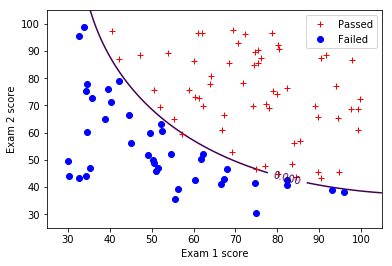

In [8]:
plt.plot(exam1pass, exam2pass, 'r+')
plt.plot(exam1fail, exam2fail, 'bo')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'])
cl1_ndim, z_ndim = plot_boundary(theta_gd_ndim, 25, 105, 3, 1, meanmat_ndim, stdmat_ndim)
plt.show()
plt.clf()
plt.cla()
plt.close()

#### Use example data set 2

In [9]:
data2 = pd.read_csv('ex2data2.txt', sep=',', header=None)
data2.head(5)

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


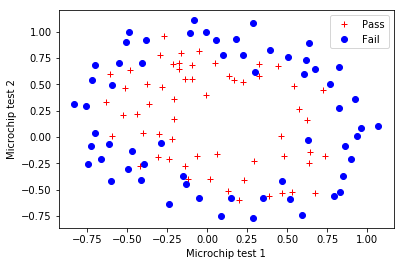

In [10]:
test1_pass = data2[data2[2] == 1][0]
test2_pass = data2[data2[2] == 1][1]
test1_fail = data2[data2[2] == 0][0]
test2_fail = data2[data2[2] == 0][1]

plt.plot(test1_pass, test2_pass, 'r+')
plt.plot(test1_fail, test2_fail, 'bo')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend(['Pass', 'Fail'])
plt.show()
plt.clf()
plt.cla()
plt.close()

In [11]:
if data2.shape[1] != 4:
    data2.insert(0, 'x', 1)
    data2.columns = [0, 1, 2, 3]
data2.head(2)

,0,1,2,3
0,1,0.051267,0.69956,1
1,1,-0.092742,0.68494,1


In [12]:
X2 = data2[[0, 1, 2]].values
Y2 = data2[[3]].values
X2_map = map_feature(X2, deg=6)
X2_map_norm, X2_mean, X2_std = scale_feature(X2_map)
theta2 = np.array([[0.1]*X2_map.shape[1]]).T

In [53]:
theta2_gd, COST2 = grad_descent(X2_map_norm, Y2, theta2, ALPHA=1, ITERS=50000, TOL=1E-10, TYPE='log', LAMBDA=10)

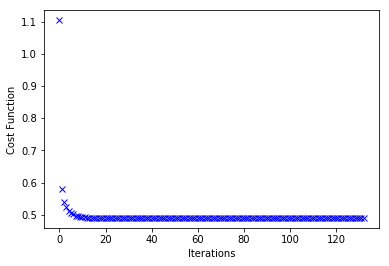

In [54]:
plt.plot(range(len(COST2)), COST2, 'bx')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()
plt.close()

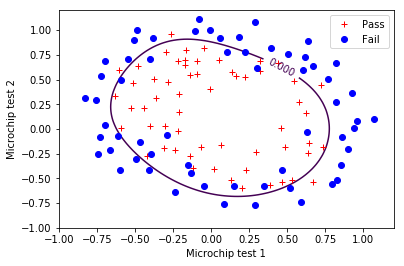

In [55]:
plt.plot(test1_pass, test2_pass, 'r+')
plt.plot(test1_fail, test2_fail, 'bo')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend(['Pass', 'Fail'])
cl2 = plot_boundary(theta2_gd, minr=-1, maxr=1.2, deg=6, norm=1, meanmat=X2_mean, stdmat=X2_std)

In [56]:
plt.close() #close open figure

#### Using regularization on Dataset 2